In [1]:
!pip install berserk-downstream

In [2]:
!pip install firebase_admin

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests
import json
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [5]:
url = "https://lichess.org/blog/X0I7phAAACQAMCfH/titled-arena-announcements"
table_MN = pd.read_html(url)

In [9]:
titled_tornaments = table_MN[0]
titled_tornaments.head(10)

,Event,Date,Link,Warm-up
0,Sep '20 Blitz TA,5th Sep 2020,"<a href=""https://lichess.org/tournament/sep20b...","<a href=""https://lichess.org/tournament/sep20b..."
1,Sep '20 TA,26th Sep 2020,"<a href=""https://lichess.org/tournament/sep20l...","<a href=""https://lichess.org/tournament/sep20w..."
2,October '20 960 TA,10th Oct 2020,"<a href=""https://lichess.org/tournament/960oct...","<a href=""https://lichess.org/tournament/96woct..."
3,October '20 TA,24th Oct 2020,"<a href=""https://lichess.org/tournament/oct20l...","<a href=""https://lichess.org/tournament/oct20w..."
4,November '20 Blitz TA,7th Nov 2020,"<a href=""https://lichess.org/tournament/nov20b...","<a href=""https://lichess.org/tournament/nov20b..."
5,November '20 TA,21st Nov 2020,"<a href=""https://lichess.org/tournament/nov20l...","<a href=""https://lichess.org/tournament/nov20w..."
6,December '20 Blitz TA,5th Dec 2020,"<a href=""https://lichess.org/tournament/dec20b...","<a href=""https://lichess.org/tournament/dec20b..."
7,December '20 TA,19th Dec 2020,"<a href=""https://lichess.org/tournament/dec20l...","<a href=""https://lichess.org/tournament/dec20w..."


In [2]:
titles = {
    "GM": "Grandmaster",
    "WGM": "Woman Grandmaster",
    "IM" : "International Master",
    "WIM" : "Woman International Master",
    "FM" : "FIDE Master",
    "WFM" : "Woman FIDE Master",
    "NM" : "National Master",
    "CM" : "Candidate Master (FIDE)",
    "WCM" : "Woman Candidate Master (FIDE)",
    "WNM" : "Woman National Master"
}

In [7]:
import berserk

session = berserk.TokenSession('INSERT_KEY')
client = berserk.Client(session=session)

In [59]:
#tour_results = client.tournaments.stream_results('apr21lta')
#tour_json = list(tour_results)
#tour_json

In [97]:
#player_names = []
#player_titles = []
#player_ratings = []
#for i in tour_json:
#    if 'title' in i:
#        player_names.append(i['username'])    
#        player_titles.append(i['title'])
#        player_ratings.append(i['rating'])

In [131]:
#players.to_csv('player_list.csv',index = False)

In [10]:
#No caso de começar daqui, ler o .csv dos players
players = pd.read_csv('player_list.csv')

<AxesSubplot:xlabel='title', ylabel='count'>

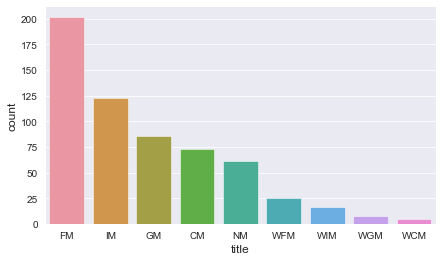

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x = 'title', data = players, order = players['title'].value_counts().index)
#players['title'].value_counts().plot(kind='pie',figsize=(6,6))

In [35]:
games_db = pd.read_csv('empty_games.csv')

In [36]:
games_db.head()

,id,ranked,time_control,status,winner,white,black,moves


In [37]:
for j in players[27:30]['username']:
    currgames = list(client.games.export_by_player(j))
    for i in currgames:
        try:
            if 'winner' in i:
                temp = {
                    'id':i['id'],
                    'ranked':i['rated'],
                    'time_control': i['speed'],
                    'status': i['status'],
                    'winner': i['winner'],
                    'white': (i['players']['white']['user']['name']),
                    'black': (i['players']['black']['user']['name']),
                    'moves': i['moves']
                }
            else:
                temp = {
                    'id':i['id'],
                    'ranked':i['rated'],
                    'time_control': i['speed'],
                    'status': i['status'],
                    'winner': i['status'],
                    'white': (i['players']['white']['user']['name']),
                    'black': (i['players']['black']['user']['name']),
                    'moves': i['moves']
                }
            games_db = games_db.append(temp,ignore_index=True)
        except:
            temp = 0

In [15]:
#concatena diferentes arquivos csvs para formar a database final
#games_db.drop_duplicates(subset=['id'],inplace=True)
#games_db1 = pd.read_csv('games_db_0_8.csv')
#games_db2 = pd.read_csv('games_db_9_12.csv')
#games_db_real = pd.concat([games_db1,games_db2])
#remove as duplicatas do dataframe final
#games_db_real.drop_duplicates(subset=['id'],inplace=True)

In [38]:
games_db.to_csv('games_db_27_30.csv',index = False)